<a href="https://colab.research.google.com/github/replayseong/analysis-exercise/blob/main/DS2%EA%B8%B0_%ED%86%B5%EA%B3%84_%EB%A9%94%EC%9D%B8%ED%80%98%EC%8A%A4%ED%8A%B8_%EC%84%B1%EC%9E%AC%ED%98%84_240716.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
#!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [227]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [228]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

In [230]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

## 무작위로 1000개의 표본을 추출.
sample = df.sample(n=1000, random_state = 202150753)

## 전체 Dataset의 평균과 표준편차
population_mean = df["TotalPrice"].mean()
population_std = df["TotalPrice"].std()

## 추출된 Dataset의 평균과 표준편차
sample_mean = sample["TotalPrice"].mean()
sample_std = sample["TotalPrice"].std()

## 결과를 출력해서 비교해보자.
print("모집단의 평균:", population_mean)
print("모집단의 표준편차:", population_std)
print("표본의 평균:", sample_mean)
print("표본의 표준편차:", sample_std)

모집단의 평균: 17.98779487699964
모집단의 표준편차: 378.8108235059747
표본의 평균: 16.59557
표본의 표준편차: 31.433060830728657


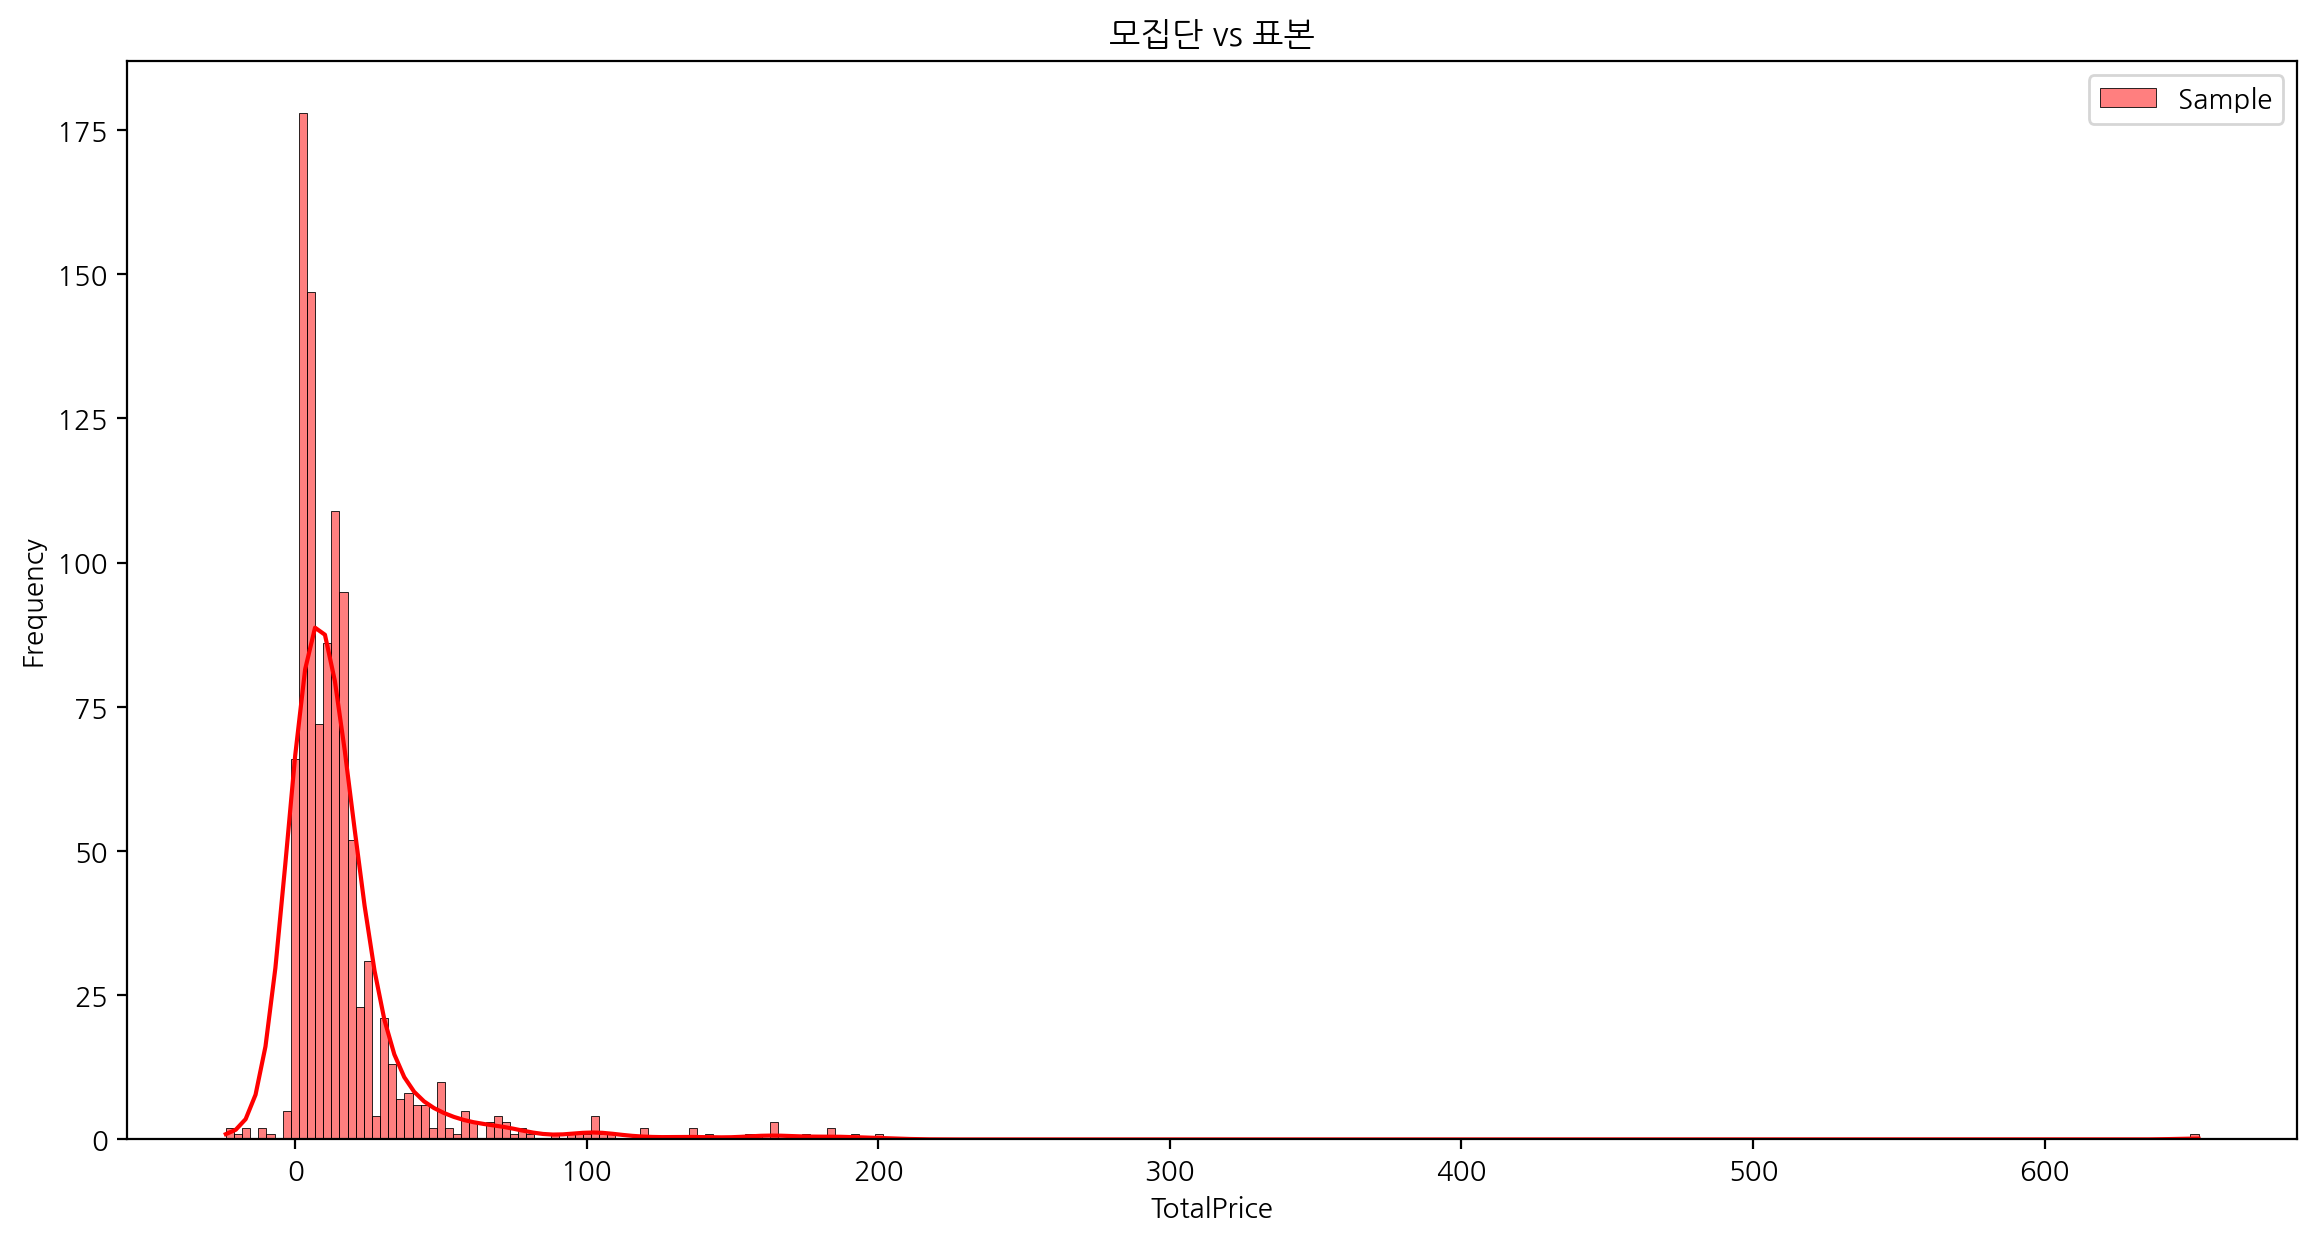

In [173]:
## 모집단의 평균과 표본의 평균은 엄청난 차이를 보이지 않았던 것 같다.
## 하지만, 모집단은 매우 높은 표준편차의 수치를 보였다. 이는 표본에 비해 모집단의 데이터가 넓게 분포해 있음을 알 수 있다.
## 직접 비교를 해보자.

# 시각화
plt.figure(figsize=(14, 7))
#sns.histplot(df['TotalPrice'], kde=True, color='yellow', label='Population')
sns.histplot(sample['TotalPrice'], kde=True, color='red', label='Sample')
plt.legend()
plt.title('모집단 vs 표본')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.show()
## 중심극한정리는 표본이 많아질수록 점점 정규분포에 근사한다.
## 모집단 시각화는 데이터 수가 너무 많아 실행이 되지 않았다.. 그래서 표본만 시각화를 해 보았다

In [174]:
## 중심극한정리는 표본의 개수를 조정해 보면 알 수 있다!
sample_10 = df.sample(n=10, random_state = 202150753)
sample = df.sample(n=1000, random_state = 202150753)
sample_30 = df.sample(n=30, random_state = 202150753)
sample_100 = df.sample(n=100, random_state = 202150753)
sample_500 = df.sample(n=500, random_state = 202150753)

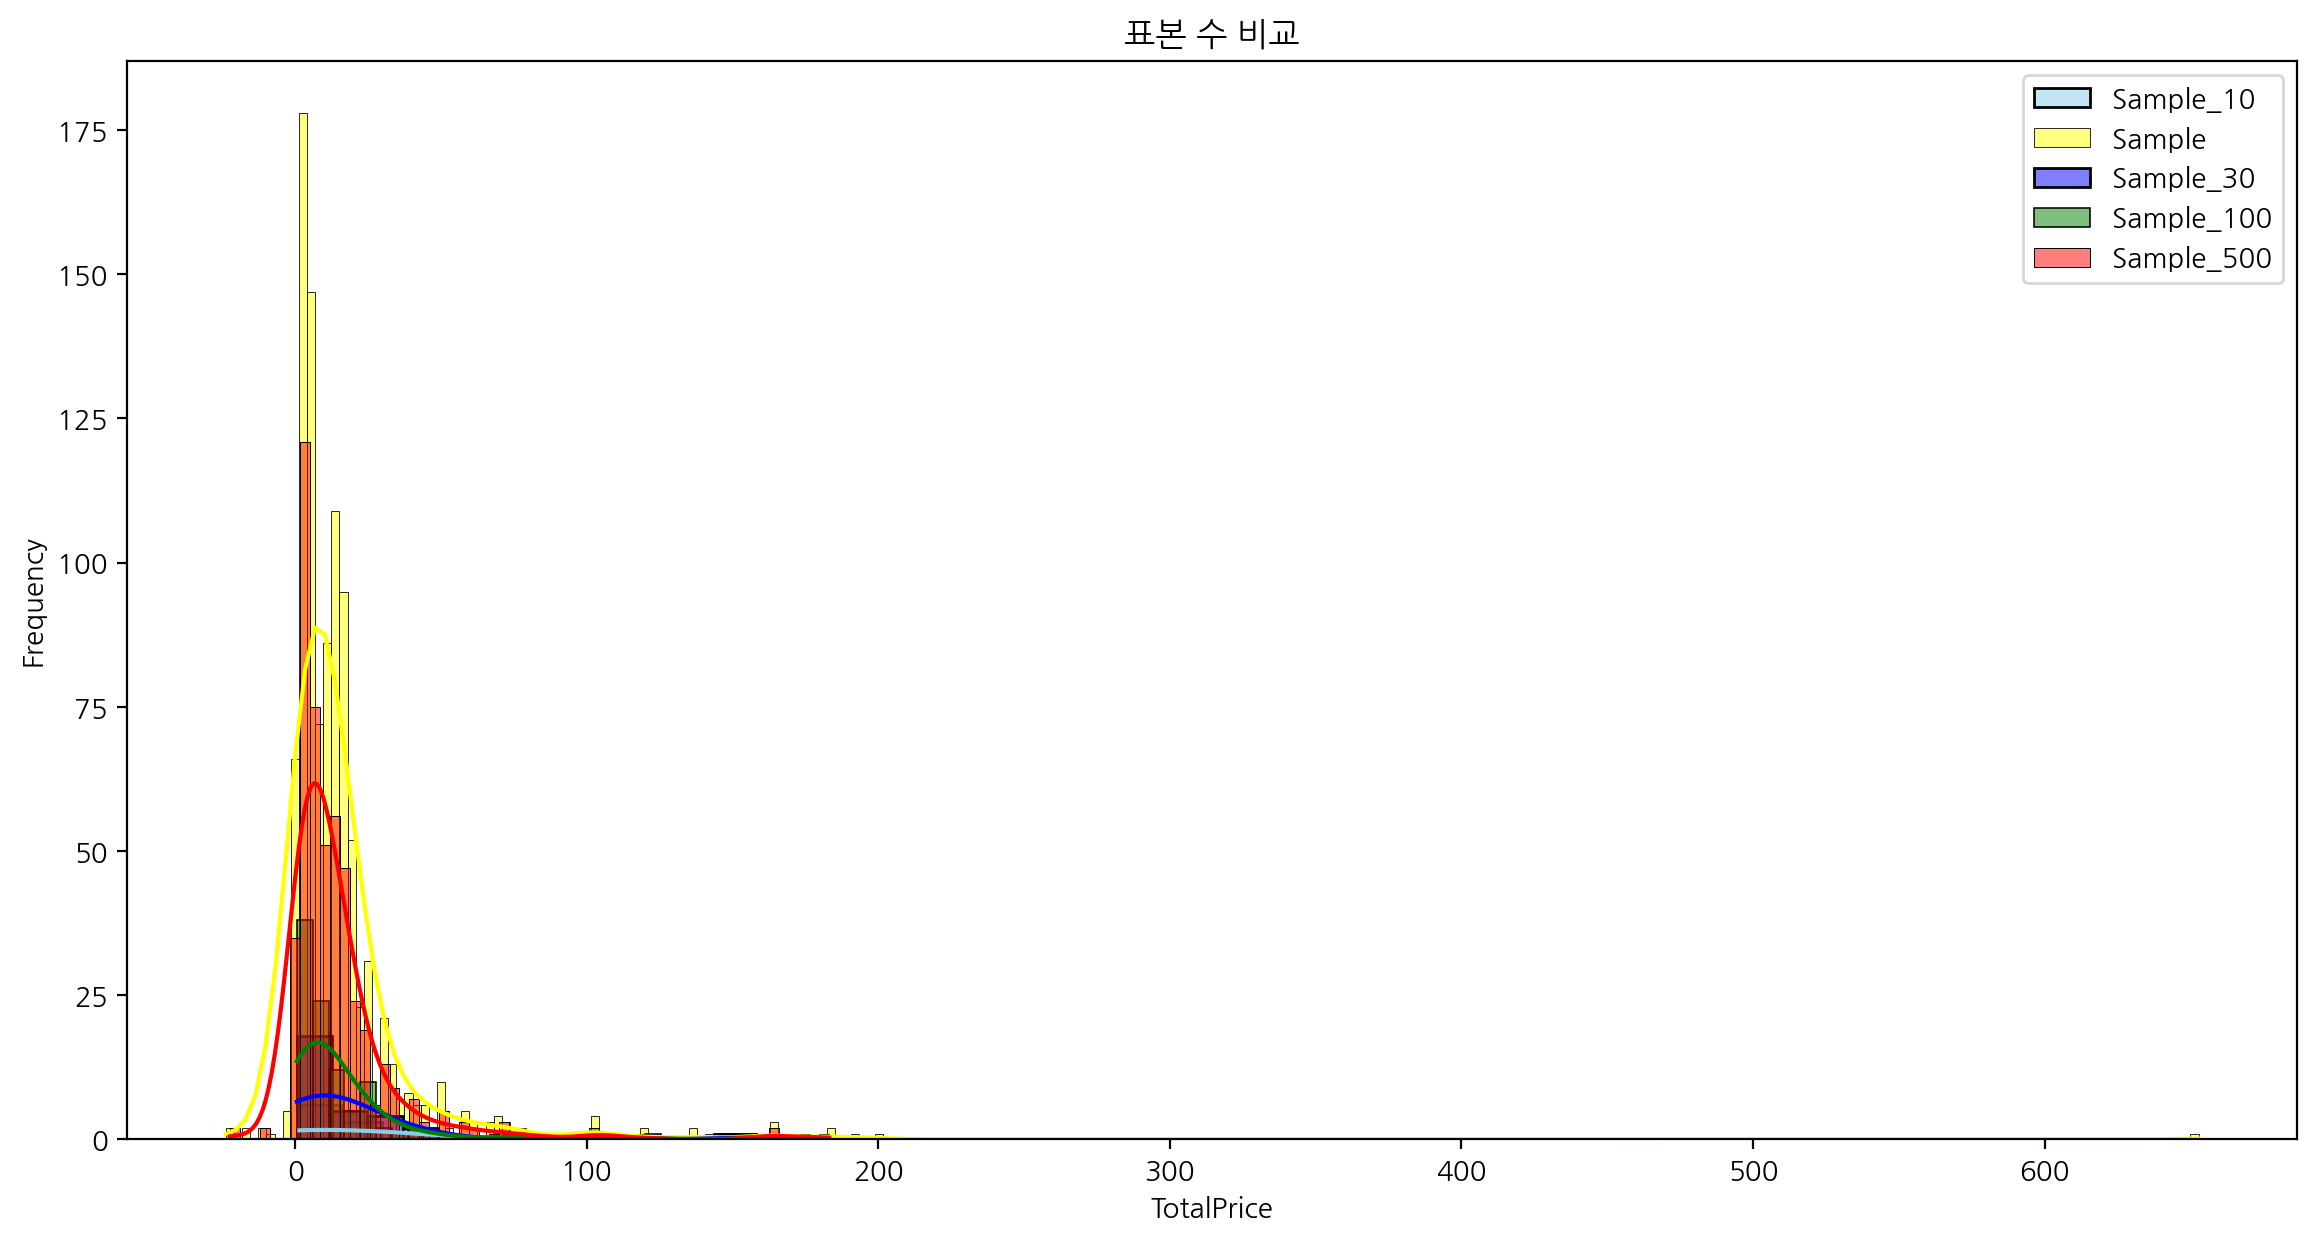

In [175]:
plt.figure(figsize=(14, 7))
sns.histplot(sample_10['TotalPrice'], kde=True, color='skyblue', label='Sample_10')
sns.histplot(sample['TotalPrice'], kde=True, color='yellow', label='Sample')
sns.histplot(sample_30['TotalPrice'], kde=True, color='blue', label='Sample_30')
sns.histplot(sample_100['TotalPrice'], kde=True, color='green', label='Sample_100')
sns.histplot(sample_500['TotalPrice'], kde=True, color='red', label='Sample_500')
plt.legend()
plt.title('표본 수 비교')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.show()
## 중심극한정리는 표본이 많아질수록 점점 정규분포에 근사한다.
## 모집단 시각화는 데이터 수가 너무 많아 실행이 되지 않았다.. 그래서 표본만 시각화를 해 보았다
## 대략 30부터는 정규분포의 그림이 그려지는 것을 알 수 있었다.

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [176]:
## 우선 가장 빈도가 높은 두 개의 국가가 어디지?
df["Country"].value_counts().head(2)

Country
United Kingdom    495478
Germany             9495
Name: count, dtype: int64

In [177]:
## 영국과 독일이다. 각 국가의 totalprice 평균을 구해보자
uk_mean = df[df["Country"] == "United Kingdom"]["TotalPrice"].mean()
germany_mean = df[df["Country"] == "Germany"]["TotalPrice"].mean()

uk_var = df[df["Country"] == "United Kingdom"]["TotalPrice"].var()
germany_var = df[df["Country"] == "Germany"]["TotalPrice"].var()

print("영국 평균:", uk_mean)
print("독일 평균:", germany_mean)
print("영국 분산:", uk_var)
print("독일 분산:", germany_var)
# 분산이 많이 다르다. -> equal_var를 false로 설정해야 하는 이유.

영국 평균: 16.525065419655366
독일 평균: 23.348942601369142
영국 분산: 155897.92728864553
독일 분산: 1393.1426121533302


In [178]:
## 겉으로 보기에는 차이가 있어보인다. 독립표본 t-검정을 진행해보자
## 가설은 H0 : 평균에 차이가 없다 / H1 : 평균에 차이가 있다.
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df[df["Country"] == "United Kingdom"]["TotalPrice"], df[df["Country"] == "Germany"]["TotalPrice"], equal_var=False)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

## t통계량에 따른 p-value값을 산출하였다.
## p-value값이 매우 작다. 따라서, 두 집단의 평균은 통계적으로 유의미한 차이가 있다고 할 수 있다.

t-statistic: -10.046360185819829
p-value: 9.823416115791871e-24


In [179]:
## 제1종오류 : 귀무가설이 참인데도 귀무가설을 기각하는 의견으로 결정하는 것.
## 이 데이터로 예시를 들면 두 국가 간의 'TotalPrice' 평균에 차이가 없음이 증명되었는데도 평균에 차이가 있다고 잘못 결론내리는 오류.
## 제2종오류 : 귀무가설이 기각인데도 귀무가설을 채택하는 의견으로 결정하는 것.
## 이 데이터로 예시를 들면 두 국가 간 'TotalPrice' 평균에 차이가 있음이 증명되었지만 평균에 차이가 없다고 잘못 결론내리는 오류.

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

In [231]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

Text(0.5, 1.0, 'UnitPrice 분포 - 주중 vs 주말')

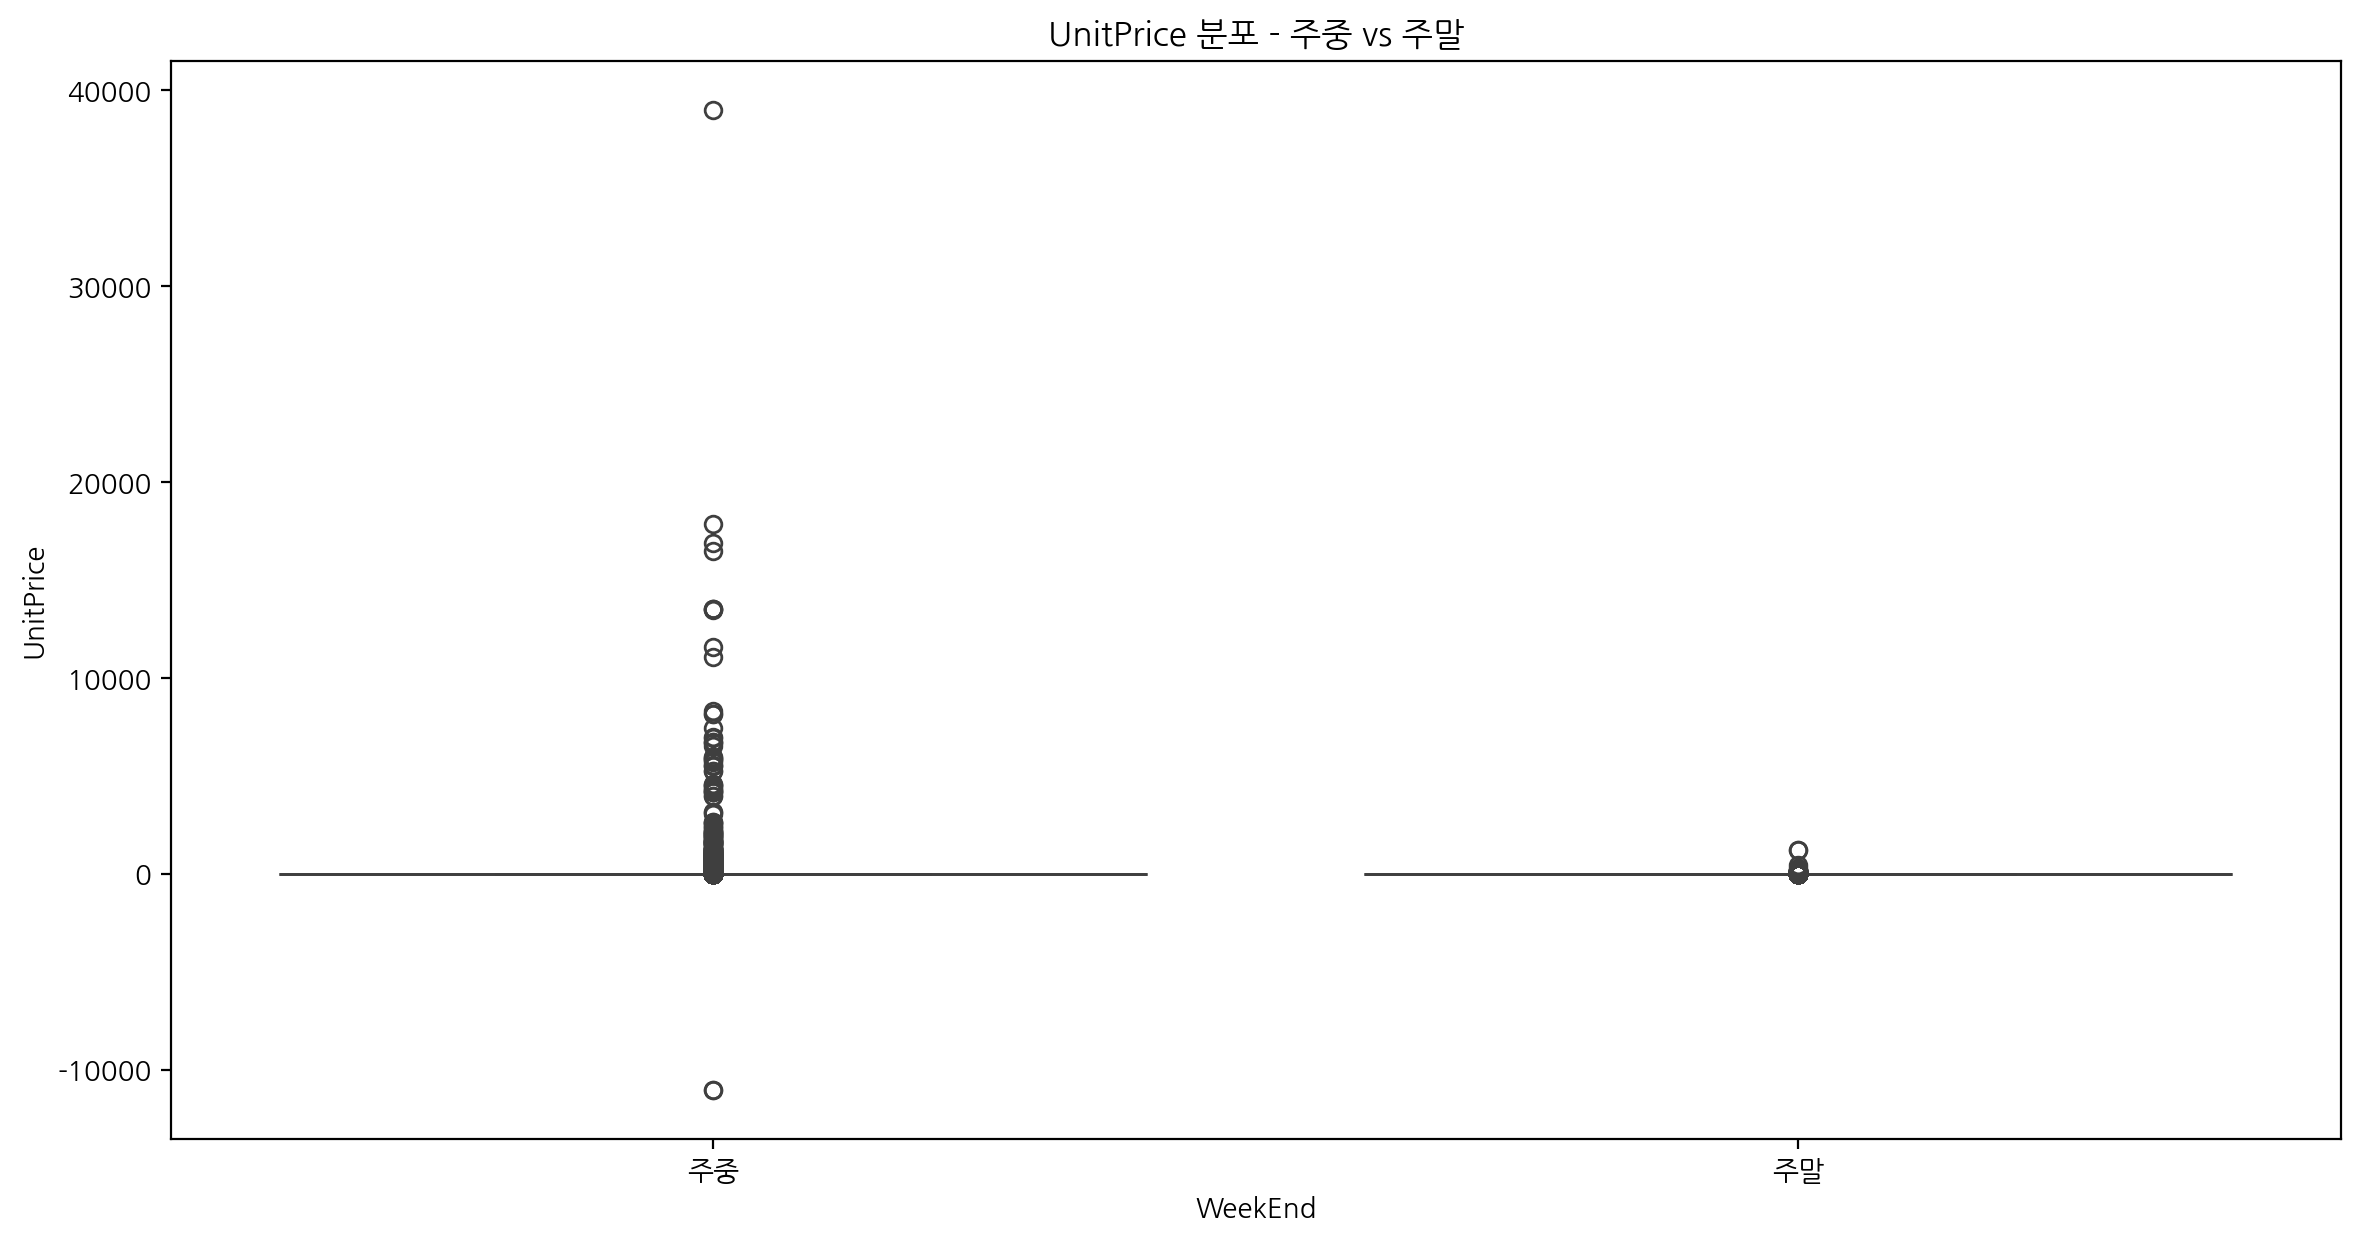

In [181]:
## 'UnitPrice'의 상자수염그림과 히스토그램을 그려보자.
plt.figure(figsize=(14, 7))
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df)
plt.title('UnitPrice 분포 - 주중 vs 주말')

In [182]:
# plt.figure(figsize=(14, 7))
# sns.histplot(weekday_data['UnitPrice'], kde=True, color='skyblue', label='weekday')
# sns.histplot(weekend_data['UnitPrice'], kde=True, color='yellow', label='weekend')
plt.show()

In [183]:
## 시각화 하는데 시간이 너무 오래걸린다.. 특히 histplot (무슨 이유일까?)
## 미션3까지 histplot 시도하는데만 40~50분은 걸린 것 같다.
## 뭔가 문제가 있다.

## 이상치 제거하고 다시 해보자.
# UnitPrice의 이상치 제거 (99백분위수 이하 데이터만 사용)
df_remove = df[df['UnitPrice'] <= df['UnitPrice'].quantile(0.99)]
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df_remove['InvoiceDate'] = pd.to_datetime(df_remove['InvoiceDate'])
df_remove['DayOfWeek'] = df_remove['InvoiceDate'].dt.dayofweek


df_remove.loc[df_remove['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df_remove.loc[df_remove['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df_remove[df_remove['DayOfWeek'] <= 4]  # 주중
weekend_data = df_remove[df_remove['DayOfWeek'] > 4]   # 주말

## 그래도 안된다. 나중에 해결하러 오자

<ipython-input-183-b160cbaea80d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remove['InvoiceDate'] = pd.to_datetime(df_remove['InvoiceDate'])
<ipython-input-183-b160cbaea80d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remove['DayOfWeek'] = df_remove['InvoiceDate'].dt.dayofweek


In [184]:
# plt.figure(figsize=(14, 7))

## sns.histplot(df_remove['UnitPrice'], kde=True, color='skyblue', label='weekday')
# plt.show()

In [185]:
## 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요.
## 분위수
quantile = {
    "주중": weekday_data["UnitPrice"].quantile([0.25, 0.5, 0.75]),
    "주말": weekend_data["UnitPrice"].quantile([0.25, 0.5, 0.75])
}

stats_quantile_df = pd.DataFrame(quantile).T
stats_quantile_df.columns = ["25%", "50%", "75%"]
print(stats_quantile_df)

     25%   50%   75%
주중  1.25  2.10  4.13
주말  1.25  1.79  3.75


In [186]:
## 중심경향치(평균, 중간값, 최빈값) -> 경향분석
center = {
    weekday_data["UnitPrice"].mean(),
    weekend_data["UnitPrice"].mean(),
    weekday_data["UnitPrice"].median(),
    weekend_data["UnitPrice"].median(),
}

stats_center_df = pd.DataFrame(center)
print(weekend_data["UnitPrice"].mode()[0]) # 1.25
print(stats_center_df)

1.25
          0
0  1.790000
1  2.745786
2  3.120297
3  2.100000


In [187]:
## 주중은 평균 1.79, 중앙값 3.120297, 최빈값 1.25 (이건 최빈값에 오류가 있나..?)
## 주말은 평균 2.74, 중앙값 2.1, 최빈값 1.25 (음의 왜도) -> 왼쪽으로 긴 꼬리 분포이다.

In [188]:
## 변산성(표준편차, 분산)

print(weekday_data["UnitPrice"].std())
print(weekend_data["UnitPrice"].std())
print(weekday_data["UnitPrice"].var())
print(weekend_data["UnitPrice"].var())



22.958204723136607
2.6573900276722395
527.079164109452
7.061721759171866


In [189]:
## 코딩 거창하게 하려다가 시간만 날렸다...
## 그냥 수치만 나타내도 되는데
## 결론은! 주중의 편향도가 주말의 편향도보다 훨씬 높은 것을 볼 수 있다.
## 그만큼 주중의 데이터는 매우 큰 폭으로 다양하게 퍼져있다고 예측할 수 있다.


## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

In [190]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

In [232]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2,주중
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중


In [223]:
## 주중의 데이터 판매량, 단가의 평균(가능하면 합계로도 비교)을 분석해본다.
weekday_group = weekday_data[weekday_data["Country"].isin(country_group)].groupby("Country").agg({"TotalPrice": "sum", "Quantity": "sum"})
print(weekday_group)

## 주말
weekend_group = weekend_data[weekend_data["Country"].isin(country_group)].groupby("Country").agg({"TotalPrice": "sum", "Quantity": "sum"})
print(weekend_group)

           TotalPrice  Quantity
Country                        
Canada        3115.44      2762
Hong Kong     9717.44      4760
Japan        31301.52     22494
Lebanon       1693.88       386
Singapore     8805.39      5231
USA           1730.92      1034
         TotalPrice  Quantity
Country                      
Japan       4084.67      2725


In [234]:
## ? 주말은 일본밖에 없네?
## 의미가 있나? 그냥 주중, 주말 합치자 (그러면 이 처리를 한게 의미가 없다.)
df_group = df[df["Country"].isin(country_group)].groupby("Country").agg({"TotalPrice": "sum", "Quantity": "sum"})
df_group['average_price'] = df_group['TotalPrice'] / df_group['Quantity']
print(df_group) # 판매량 별 평균 단가는 Lebanon, Hongkong이 높은 단가수치를 보였다.
## 그러면 과연 전체 데이터에서도 영향을 미칠까? -> 아니.. ?

           TotalPrice  Quantity  average_price
Country                                       
Canada        3666.38      2763       1.326956
Hong Kong    10117.04      4769       2.121417
Japan        35340.62     25218       1.401405
Lebanon       1693.88       386       4.388290
Singapore     9120.39      5234       1.742528
USA           1730.92      1034       1.674004


In [238]:
## 특정 상품의 판매량이나 단가가 국가별로 다른지
## StockCode 살펴보자.
df["StockCode"].value_counts().head(5)

## 일단 Top5를 분석해보자. (특정 상품의 판매량, 단가 확인을 위해)
product_top5 = ["85123A", "22423", "85099B", "47556", "20725"]

In [243]:
df_stocktop5_group = df[df["StockCode"].isin(product_top5)].groupby("Country").agg({"TotalPrice": "sum", "Quantity": "sum"})
df_stocktop5_group['average_price'] = df_stocktop5_group['TotalPrice'] / df_stocktop5_group['Quantity']
## 이걸 average_price 큰 순서대로 나열.
df_stocktop5_group.sort_values(by="average_price", ascending=False)

,TotalPrice,Quantity,average_price
Country,,,
Iceland,191.25,15,12.750000
Bahrain,25.50,2,12.750000
Canada,12.75,1,12.750000
Lebanon,153.00,12,12.750000
USA,114.75,9,12.750000
United Arab Emirates,153.00,12,12.750000
Brazil,175.20,16,10.950000
Israel,557.00,52,10.711538
Malta,106.95,13,8.226923


In [248]:
# country_group만 해당되는 걸 보고싶다.
filtered_df = df_stocktop5_group[df_stocktop5_group.index.isin(country_group)]
filtered_df.sort_values(by = "average_price", ascending = False)
## 단가만 놓으면 Top5는 다음과 같은 수치가 나왔다.


,TotalPrice,Quantity,average_price
Country,,,
Canada,12.75,1,12.750000
Lebanon,153.00,12,12.750000
USA,114.75,9,12.750000
Hong Kong,169.50,22,7.704545
Singapore,371.00,96,3.864583
Japan,226.05,149,1.517114


In [249]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2,주중
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중


In [252]:
## 그럼 전체 물품은 다른가?
# 전체 데이터에서 country_group에 속하는 국가들만 필터링
df_filtered = df[df["Country"].isin(country_group)]

# 국가별로 총 판매량, 총 판매 수량, 평균 단가 계산
country_grouped = df_filtered.groupby("Country").agg({"TotalPrice": "sum", "Quantity": "sum"}).reset_index()
country_grouped["average_price"] = country_grouped["TotalPrice"] / country_grouped["Quantity"]
print(country_grouped) # 어? 아까 Top5는 Canada, USA는 높았는데, 이번의 평균 단가량은 적은 수치를 보였다. -> 심슨의 역설.(부분적으로 높은 판매량별 단가였지만, 전체로 놓고 보면 아니였다.)


     Country  TotalPrice  Quantity  average_price
0     Canada     3666.38      2763       1.326956
1  Hong Kong    10117.04      4769       2.121417
2      Japan    35340.62     25218       1.401405
3    Lebanon     1693.88       386       4.388290
4  Singapore     9120.39      5234       1.742528
5        USA     1730.92      1034       1.674004


In [ ]:
## 아.. 예를들어 부분을 구현해버렸네
## 문제의 방식대로 진행했어야 되는데 ㅠㅠ


## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [191]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2,주중
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중


In [192]:
## 결측치 제거
# 우선, 결측치 확인. (Description, CustomerID 부분이 너무 많다.)
df.isna().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
InvoiceMonth         0
TotalPrice           0
DayOfWeek            0
WeekEnd              0
dtype: int64

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  category      
 1   StockCode     541909 non-null  category      
 2   Description   540455 non-null  category      
 3   Quantity      541909 non-null  int32         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float32       
 7   Country       541909 non-null  object        
 8   InvoiceMonth  541909 non-null  int32         
 9   TotalPrice    541909 non-null  float64       
 10  DayOfWeek     541909 non-null  int32         
 11  WeekEnd       541909 non-null  object        
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(3), object(2)
memory usage: 33.6+ MB


In [194]:
## 제거한다고 달라질까..? -> 여기에선 제거를 하라 했으니 제거하자
df.dropna(inplace = True)

In [195]:
df.info() # 결측치가 모두 제거되었다.

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  category      
 1   StockCode     406829 non-null  category      
 2   Description   406829 non-null  category      
 3   Quantity      406829 non-null  int32         
 4   InvoiceDate   406829 non-null  datetime64[ns]
 5   UnitPrice     406829 non-null  float64       
 6   CustomerID    406829 non-null  float32       
 7   Country       406829 non-null  object        
 8   InvoiceMonth  406829 non-null  int32         
 9   TotalPrice    406829 non-null  float64       
 10  DayOfWeek     406829 non-null  int32         
 11  WeekEnd       406829 non-null  object        
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(3), object(2)
memory usage: 28.7+ MB


In [196]:
## 이상치 처리
## 분포를 살펴보자.
df.describe()
## 마이너스가 있네..?

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,TotalPrice,DayOfWeek
count,406829.000000,406829,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.692383,7.605947,20.401854,2.606402
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,1.000000,-168469.600000,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,5.000000,4.200000,1.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,8.000000,11.100000,2.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,11.000000,19.500000,4.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,12.000000,168469.600000,6.000000
std,248.693370,NaN,69.315162,1713.600342,3.418942,427.591718,1.921907


In [197]:
df[df['TotalPrice']<0]
## 아. Quantity 중에 마이너스가 있구나(취소)
## 이 부분도 제거를 해 줘야겠다.
df = df[df['TotalPrice'] >= 0]

In [198]:
df.describe() ## 제거가 되었음을 확인할 수 있다.

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,TotalPrice,DayOfWeek
count,397924.000000,397924,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.312500,7.612537,22.394749,2.614555
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,1.000000,0.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,5.000000,4.680000,1.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,8.000000,11.800000,2.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,11.000000,19.800000,4.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,12.000000,168469.600000,6.000000
std,180.420210,NaN,22.096788,1713.169922,3.416527,309.055588,1.928274


In [199]:
## 흠.. 왜도, 첨도의 값이 매우 높다.
## 우선 y = 18.8363 + 1.1419 * UnitPrice이다.
## 그런데.. 설명력이 너무 없다. 이상치 처리를 하고 다시 해봐야겠다.

# 이상치 제거 과정 (일단은 상위 1%, 하위 1%를 제거하고 다시 해보자.)
df['UnitPrice'] = df['UnitPrice'].clip(df['UnitPrice'].quantile(0.01), df['UnitPrice'].quantile(0.99))
df['TotalPrice'] = df['TotalPrice'].clip(df['TotalPrice'].quantile(0.01), df['TotalPrice'].quantile(0.99))

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397924 non-null  category      
 1   StockCode     397924 non-null  category      
 2   Description   397924 non-null  category      
 3   Quantity      397924 non-null  int32         
 4   InvoiceDate   397924 non-null  datetime64[ns]
 5   UnitPrice     397924 non-null  float64       
 6   CustomerID    397924 non-null  float32       
 7   Country       397924 non-null  object        
 8   InvoiceMonth  397924 non-null  int32         
 9   TotalPrice    397924 non-null  float64       
 10  DayOfWeek     397924 non-null  int32         
 11  WeekEnd       397924 non-null  object        
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(3), object(2)
memory usage: 28.1+ MB


In [201]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 단순 회귀분석
## 단가를 독립변수로, 총 판매액을 종속변수로 설정
x = df['UnitPrice']
y = df['TotalPrice']

## 상수항을 추가한다(행렬 기준)
x = sm.add_constant(x)

## 회귀분석
model = sm.OLS(y, x)
result = model.fit()

## 결과는?
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                 1.332e+04
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:29:02   Log-Likelihood:            -1.9049e+06
No. Observations:              397924   AIC:                         3.810e+06
Df Residuals:                  397922   BIC:                         3.810e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5620      0.066    206.859      0.0

In [202]:
## 결정계수가 0.09에서 더 낮아졌다.. 뭐지
## 계수들은 통계적으로 유의미하지만, 회귀모델 자체가 성능이 매우 낮다.
## 추후 다양한 처리를 해서 결정계수 수치를 높여야겠다. (너무 낮다. 3.2%는 거의 쓰지 못하는 수준이다.)

## 미션6) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [203]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [204]:
df_promotion.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd,IsChristmasPeriod,IsChristmasProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2,주중,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False


In [205]:
df_promotion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26160 entries, 0 to 42452
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   InvoiceNo           26160 non-null  category      
 1   StockCode           26160 non-null  category      
 2   Description         26160 non-null  category      
 3   Quantity            26160 non-null  int32         
 4   InvoiceDate         26160 non-null  datetime64[ns]
 5   UnitPrice           26160 non-null  float64       
 6   CustomerID          26160 non-null  float32       
 7   Country             26160 non-null  object        
 8   InvoiceMonth        26160 non-null  int32         
 9   TotalPrice          26160 non-null  float64       
 10  DayOfWeek           26160 non-null  int32         
 11  WeekEnd             26160 non-null  object        
 12  IsChristmasPeriod   26160 non-null  bool          
 13  IsChristmasProduct  26160 non-null  bool          


## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

In [206]:
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.

In [207]:
## 우선, 회귀분석에 필요한 열만 선택
df_promotion_ols = df_promotion.copy()
df_promotion_ols = df_promotion[["Quantity", "IsChristmasPeriod", "UnitPrice", "Country", "IsChristmasProduct"]]

In [208]:
df_promotion_ols.isna().sum() # 결측치 있니? 없다.

Quantity              0
IsChristmasPeriod     0
UnitPrice             0
Country               0
IsChristmasProduct    0
dtype: int64

In [214]:
## 국가를 더미 변수로 변환
df_promotion_ols.head()

,Quantity,IsChristmasPeriod,UnitPrice,IsChristmasProduct,Country_Austria,Country_Belgium,Country_Channel Islands,Country_Cyprus,Country_Denmark,Country_EIRE,...,Country_Japan,Country_Lithuania,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom
0,6,False,2.55,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,6,False,3.39,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,8,False,2.75,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,6,False,3.39,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,6,False,3.39,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [215]:
model = ols('Quantity ~ IsChristmasProduct + UnitPrice + Country', data=df_promotion.ols).fit()
print(model.summary())

AttributeError: 'DataFrame' object has no attribute 'ols'

## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

## 회고
- 시간 분배를 적절하게 하지 못해 쉽게 풀 수 있는 앞 문항들에서 예상보다 많은 시간소요를 하였다(Weekday, Weekend Histplot 구현부분)
-> 이 부분을 신경쓰다 보니 기존에 풀었던 문제도 제대로 해결하지 못했다.
- 간단한 데이터프레임으로 가독성 있게 표현 후 결과해석을 하려고 했지만 잘 되지 않았다.

- 강사님의 실습내용 부분을 제대로 숙지하지 못했던 원인으로 아이디어 도출 부분에서 많은 시간을 할애했다. -> 1차 제출 후 1~2일 이내로 문제 해결을 추가적으로 해 볼 생각이다.

- 강사님의 자료를 다시 한 번 꼼꼼히 봐야 하는 좋은 계기의 문제들이였다.
-> 코드로 작성하는 것도 좋지만, 아이디어를 작성할 때에는 수기로도 작성해가며 생각을 하는 과정이 있었다.(해결은 하지 못했다.)